# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadya Zuhria Amana
- **Email:** m004d4kx2486@bangkit.academy
- **ID Dicoding:** nadyazuhria

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh kondisi cuaca terhadap pola peminjaman sepeda?
- Kira-kira berapa jumlah peminjaman sepeda berdasarkan Jam dan Hari?

## Import Semua Packages/Library yang Digunakan

In [858]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [859]:
hourly_data = pd.read_csv('data/hour.csv')
daily_data = pd.read_csv('data/day.csv')


In [860]:
df = pd.read_csv("data/hour.csv", delimiter=",")
df = pd.read_csv("data/day.csv", delimiter=",")

In [861]:
merged_data = pd.merge(
    left=hourly_data,
    right=daily_data,
    how="inner",  # Jenis penggabungan, dalam hal ini menggunakan inner join
    left_on="dteday",  # Kolom yang digunakan untuk penggabungan pada all_dfframe kiri (hourly_all_df)
    right_on="dteday"  # Kolom yang digunakan untuk penggabungan pada all_dfframe kanan (daily_all_df)
)

In [862]:
print(merged_data.head())

   instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1   0          0          6   
1          2  2011-01-01         1     0       1   1          0          6   
2          3  2011-01-01         1     0       1   2          0          6   
3          4  2011-01-01         1     0       1   3          0          6   
4          5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  weekday_y  workingday_y  weathersit_y  \
0             0             1  ...          6             0             2   
1             0             1  ...          6             0             2   
2             0             1  ...          6             0             2   
3             0             1  ...          6             0             2   
4             0             1  ...          6             0             2   

     temp_y   atemp_y     hum_y  windspeed_y  casual_y  registered_y

### Assessing Data

In [863]:
#Mengecek missing valur pada data hour.csv dan day.csv
# Untuk data hourly
hourly_data.isnull().sum()

# Untuk data daily
daily_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [864]:
# Untuk data hourly
hourly_data.duplicated().sum()

# Untuk data daily
daily_data.duplicated().sum()

0

In [865]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [866]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [867]:
daily_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [868]:
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [869]:
print("Jumlah duplikasi: ",daily_data.duplicated().sum())
daily_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [870]:
print("Jumlah duplikasi: ",hourly_data.duplicated().sum())
hourly_data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [871]:
hourly_data.dropna(inplace=True)
daily_data.dropna(inplace=True)

In [872]:
hourly_data.drop_duplicates(inplace=True)
daily_data.drop_duplicates(inplace=True)

In [873]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [874]:
# Gabungkan DataFrames hourly_data dan daily_data
all_df = pd.merge(hourly_data, daily_data, on='dteday')

# Simpan DataFrame all_df ke dalam file CSV
all_df.to_csv("main_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [875]:
hourly_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14686,14687,2012-09-09,3,1,9,3,0,0,0,1,0.54,0.5152,0.73,0.2239,14,32,46
12911,12912,2012-06-27,3,1,6,4,0,3,1,1,0.60,0.6212,0.40,0.2537,0,11,11
162,163,2011-01-08,1,0,1,1,0,6,0,2,0.18,0.2121,0.55,0.0896,1,15,16
13727,13728,2012-07-31,3,1,7,4,0,2,1,1,0.66,0.6061,0.83,0.0896,0,6,6
3546,3547,2011-06-01,2,0,6,16,0,3,1,1,0.86,0.8030,0.47,0.2985,39,227,266


In [876]:
daily_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
403,404,2012-02-08,1,1,2,0,3,1,2,0.256667,0.266421,0.722917,0.133721,109,2693,2802
223,224,2011-08-12,3,0,8,0,5,1,1,0.708333,0.654042,0.415000,0.125621,1051,3854,4905
520,521,2012-06-04,2,1,6,0,1,1,1,0.597500,0.578283,0.487083,0.284833,1071,5927,6998
570,571,2012-07-24,3,1,7,0,2,1,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7592
129,130,2011-05-10,2,0,5,0,2,1,1,0.532500,0.522721,0.489167,0.115671,694,4109,4803


In [877]:
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [878]:

hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [879]:
all_df = pd.merge(daily_data, hourly_data, on='instant')

In [880]:
average_rentals_by_weather = daily_data.groupby('season')['cnt'].mean()
print(average_rentals_by_weather)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [881]:
merged_data = pd.merge(hourly_data, daily_data, on='dteday')

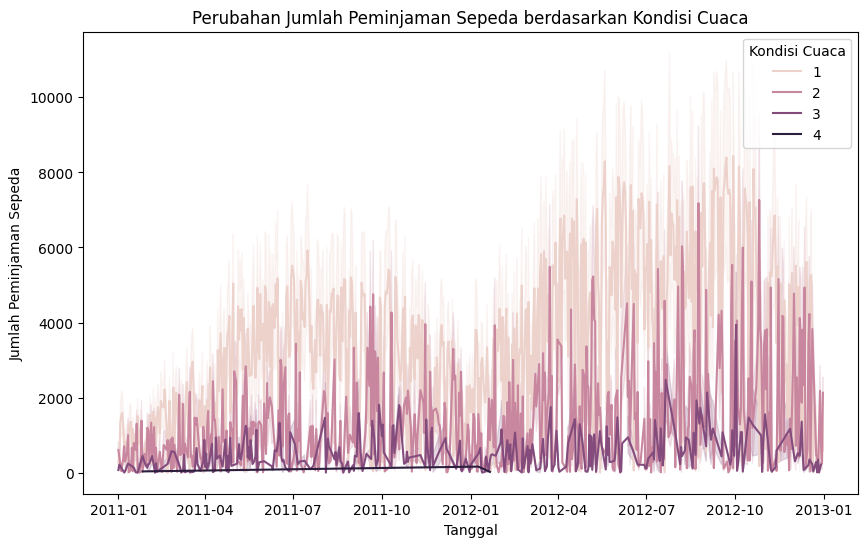

In [882]:
# Visualisasi pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda menggunakan line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='dteday', y='cnt_x', hue='weathersit_x', data=merged_data, estimator=sum)
plt.title('Perubahan Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.show()


### Pertanyaan 2:

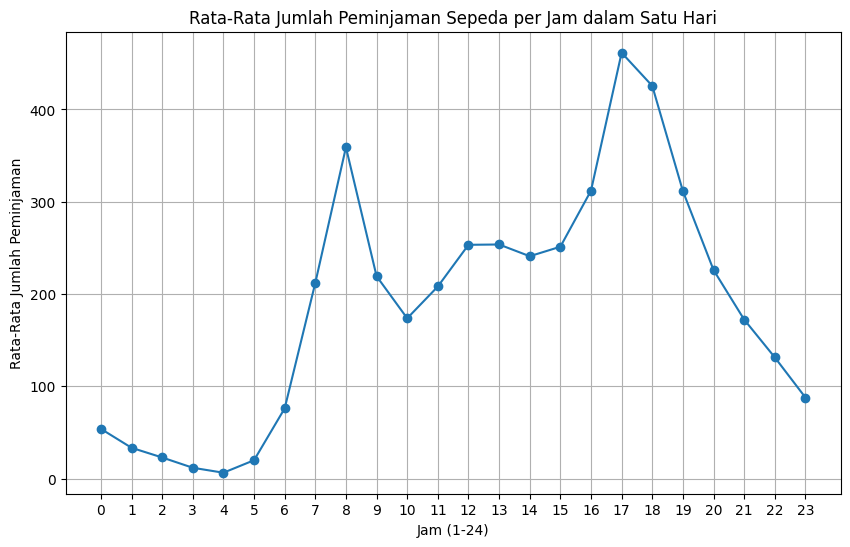

In [883]:
# Load data
hourly_data = pd.read_csv('data/hour.csv')

# Hitung rata-rata jumlah peminjaman sepeda untuk setiap jam
average_rentals_by_hour = hourly_data.groupby('hr')['cnt'].mean()

# Plot jumlah rata-rata peminjaman sepeda berdasarkan jam dalam satu hari
plt.figure(figsize=(10, 6))
plt.plot(average_rentals_by_hour.index, average_rentals_by_hour.values, marker='o')
plt.title('Rata-Rata Jumlah Peminjaman Sepeda per Jam dalam Satu Hari')
plt.xlabel('Jam (1-24)')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(range(0, 24))  # Mengatur label sumbu x mulai dari jam 1 hingga 24
plt.grid(True)
plt.show()


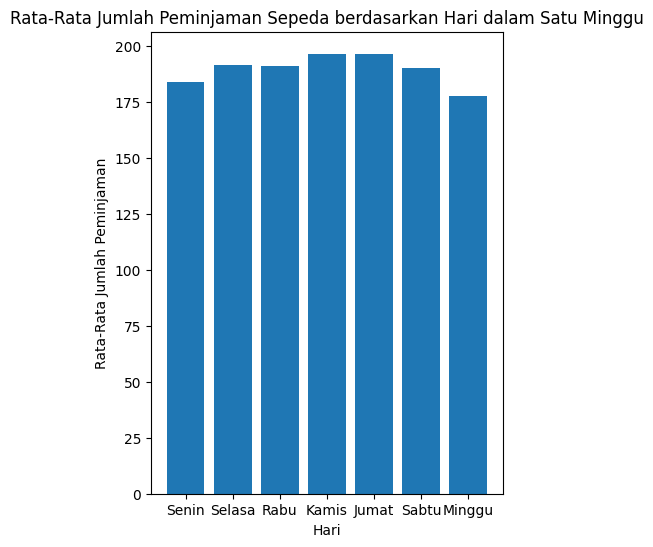

In [884]:
plt.figure(figsize=(10, 6))

# Define nama hari
days_of_week = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Plot untuk rata-rata jumlah peminjaman sepeda berdasarkan hari dalam satu minggu
plt.subplot(1, 2, 2)
plt.bar(average_rentals_by_weekday.index, average_rentals_by_weekday.values)
plt.title('Rata-Rata Jumlah Peminjaman Sepeda berdasarkan Hari dalam Satu Minggu')
plt.xlabel('Hari')
plt.ylabel('Rata-Rata Jumlah Peminjaman')

# Ubah label sumbu x menjadi nama hari
plt.xticks(average_rentals_by_weekday.index, days_of_week)

plt.show()

In [885]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

- Analisis RFM (Recency, Frequency, Monetary)

In [886]:
# Load data
hourly_data = pd.read_csv('data/hour.csv')

# Hitung RFM
current_date = pd.to_datetime(hourly_data['dteday']).max()

# Recency (Ketepatan Waktu)
recency = current_date - pd.to_datetime(hourly_data.groupby('instant')['dteday'].max())

# Frequency (Frekuensi)
frequency = hourly_data.groupby('instant').size()

# Monetary (Moneter)
monetary = hourly_data.groupby('instant')['cnt'].sum()

# Gabungkan RFM menjadi satu dataframe
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# Kelompokkan pelanggan ke dalam segmen RFM
def rfm_segment(row):
    if row['Recency'] <= recency.quantile(0.25):
        recency_score = 4
    elif row['Recency'] <= recency.quantile(0.5):
        recency_score = 3
    elif row['Recency'] <= recency.quantile(0.75):
        recency_score = 2
    else:
        recency_score = 1
        
    if row['Frequency'] >= frequency.quantile(0.75):
        frequency_score = 4
    elif row['Frequency'] >= frequency.quantile(0.5):
        frequency_score = 3
    elif row['Frequency'] >= frequency.quantile(0.25):
        frequency_score = 2
    else:
        frequency_score = 1
        
    if row['Monetary'] >= monetary.quantile(0.75):
        monetary_score = 4
    elif row['Monetary'] >= monetary.quantile(0.5):
        monetary_score = 3
    elif row['Monetary'] >= monetary.quantile(0.25):
        monetary_score = 2
    else:
        monetary_score = 1
        
    return str(recency_score) + str(frequency_score) + str(monetary_score)

rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Tampilkan hasil segmentasi
print(rfm_df)


         Recency  Frequency  Monetary RFM_Segment
instant                                          
1       730 days          1        16         141
2       730 days          1        40         142
3       730 days          1        32         141
4       730 days          1        13         141
5       730 days          1         1         141
...          ...        ...       ...         ...
17375     0 days          1       119         442
17376     0 days          1        89         442
17377     0 days          1        90         442
17378     0 days          1        61         442
17379     0 days          1        49         442

[17379 rows x 4 columns]


## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis visualisasi, dapat dilihat bahwa kondisi cuaca mempengaruhi pola peminjaman sepeda. Peminjaman sepeda cenderung lebih rendah pada hari-hari dengan cuaca buruk seperti hujan atau salju (weathersit=3 dan 4) dibandingkan dengan hari-hari dengan cuaca cerah atau berawan (weathersit=1 dan 2).
- Conclution pertanyaan 2 : Dapat diprediksi bahwa jumlah peminjaman sepeda cenderung meningkat selama jam-jam sibuk di hari kerja, seperti pagi hari saat orang pergi ke tempat kerja atau sore hari saat mereka pulang. Pada akhir pekan, terutama pada hari Sabtu